In [ ]:
# import pysindy as ps
import numpy as np
from copy import deepcopy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)
%cd /content/drive/MyDrive/pulsarData

Mounted at /content/drive
/content/drive/MyDrive/pulsarData


In [ ]:
import svdanalysismodule as svd

In [ ]:
df = pd.read_csv('oao1657_full.csv')

In [ ]:
df

,MJD,FREQUENCY,NPROFILES,FREQUENCY_ERR,FDOT,FDOT_ERR,AMPLITUDE,AMPSIG
0,54694.095137,0.000000,220,1.366387,-1.298242e-12,0.0,0.263176,0.020352
1,54697.004746,-0.000754,250,1.400834,-1.298242e-12,0.0,0.249732,0.020413
2,54701.643939,-0.004493,359,2.000264,-1.298242e-12,0.0,0.162914,0.016386
3,54704.544896,-0.004503,405,1.052998,-1.298242e-12,0.0,0.232068,0.014678
4,54707.455843,-0.005959,334,1.100372,-1.298242e-12,0.0,0.268575,0.016545
...,...,...,...,...,...,...,...,...
746,59705.674809,-0.209638,264,1.666772,1.295739e-20,0.0,0.187369,0.016977
747,59708.583732,-0.203540,255,0.906997,2.824624e-21,0.0,0.309908,0.016763
748,59711.490601,-0.204193,237,2.241717,-8.722046e-23,0.0,0.134329,0.017004
749,59719.019664,-0.208481,209,1.393158,2.381612e-20,0.0,0.172736,0.017319


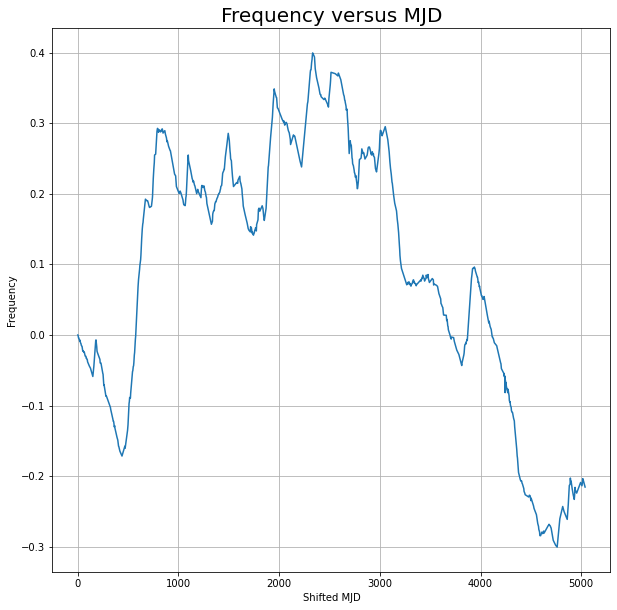

In [ ]:
# Plotting the frequency of the pulsar vs. time elapsed.

freqArray = np.array(df['FREQUENCY'])
dateArray = np.array(df['MJD'])

dateVectorShifted = dateArray - dateArray[0]

fig = plt.figure(figsize=(10,10))
plt.plot(dateVectorShifted,freqArray)
plt.xlabel('Shifted MJD')
plt.ylabel('Frequency')
plt.title('Frequency versus MJD',fontsize=20)
plt.grid()

# Git Push Sim 2023

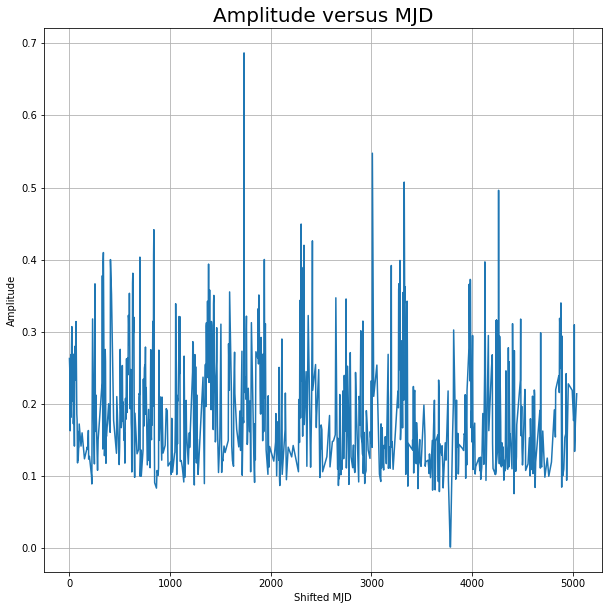

In [ ]:
# Plotting the X-ray amplitude vs. the time elapsed.

ampArray = np.array(df['AMPLITUDE'])
dateArray = np.array(df['MJD'])

dateVectorShifted = dateArray - dateArray[0]

fig = plt.figure(figsize=(10,10))
plt.plot(dateVectorShifted,ampArray)
plt.xlabel('Shifted MJD')
plt.ylabel('Amplitude')
plt.title('Amplitude versus MJD',fontsize=20)
plt.grid()

**SVD analysis of frequency data.**

In [ ]:
# SVD analysis of frequency data

dimFreq = 50
noModesFreq = 3


freqHankel,timeArrayHankelized = svd.arrayToHankel(freqArray,dateVectorShifted,dim=dimFreq)
sAnalysiFreq =svd.getSVDpowers(freqHankel)
Xfreq,UreducedFreq,sReducedFreq = svd.performSVD(freqHankel,dim=dimFreq,noModes=noModesFreq)
freqHankelRecons = svd.reconstructHankel(Xfreq,UreducedFreq,sReducedFreq)
freqArrayRecons = svd.reconstructArray(freqHankelRecons)

[37.81473235  7.70996615  3.38201252  1.80921871  1.10098238  0.84657193
  0.70063049  0.56831958  0.4830901   0.41572968  0.34476736  0.31145303
  0.27839486  0.24504688  0.23714994  0.22587052  0.21979674  0.21107183
  0.19989149  0.19728507  0.17722528  0.15700748  0.14516509  0.14276089
  0.14061336  0.13913654  0.1370345   0.13430651  0.1271673   0.12059743
  0.11920565  0.11525552  0.11081143  0.10553439  0.10538409  0.10512565
  0.10484297  0.10139787  0.1007152   0.09901457  0.09839317  0.09644489
  0.09505851  0.09075349  0.08962565  0.08929537  0.08896073  0.0871983
  0.08649275  0.07582737]


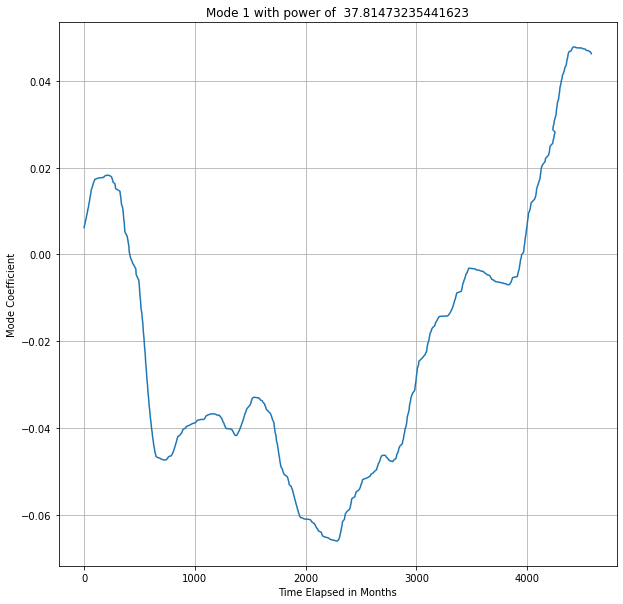

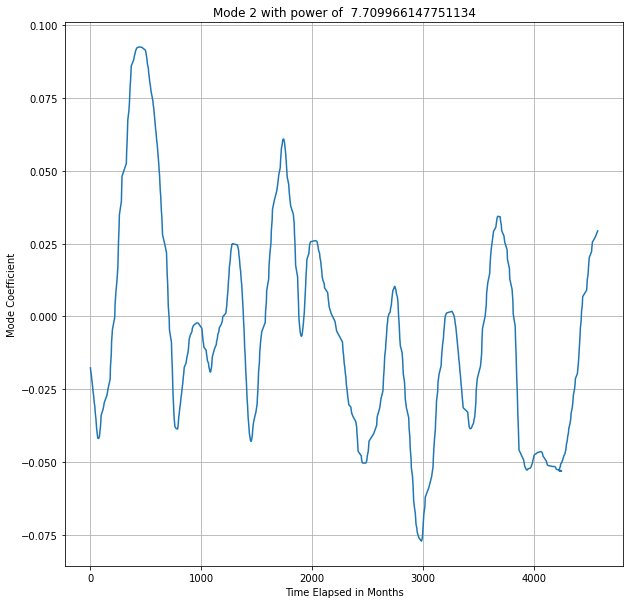

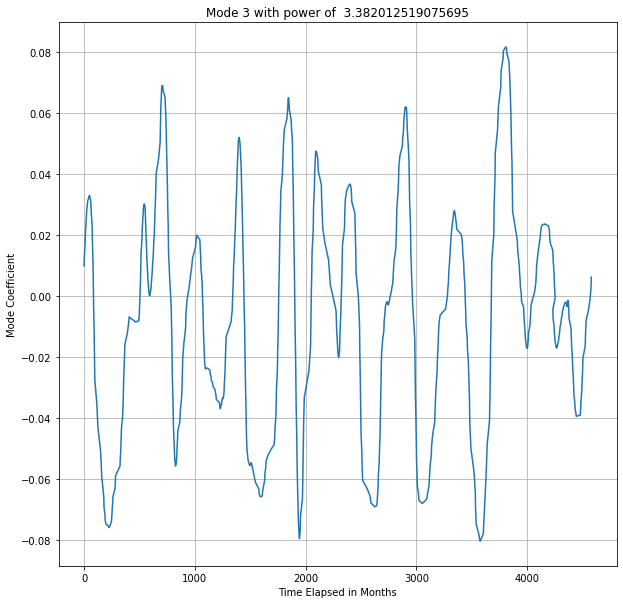

In [ ]:
# SVD analysis of frequency data
 
print(sAnalysiFreq)
svd.plotSVDModes(Xfreq,timeArrayHankelized,sAnalysiFreq)

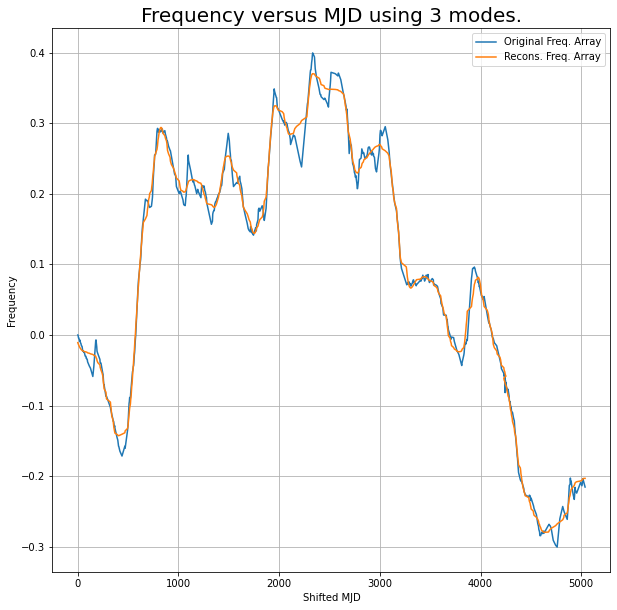

In [ ]:
# Plotting the reconstructed frequency data array.

fig = plt.figure(figsize=(10,10))
plt.plot(dateVectorShifted,freqArray,label='Original Freq. Array')
plt.plot(dateVectorShifted,freqArrayRecons,label='Recons. Freq. Array')
plt.xlabel('Shifted MJD')
plt.ylabel('Frequency')
plt.title(f'Frequency versus MJD using {noModesFreq} modes.',fontsize=20)
plt.grid()
plt.legend()

In [ ]:
# SVD analysis of amplitude data

dimAmp = 200
noModesAmp = 2


ampHankel,timeArrayHankelized = svd.arrayToHankel(ampArray,dateVectorShifted,dim=dimAmp)
sAnalysiAmp =svd.getSVDpowers(ampHankel)
Xamp,UreducedAmp,sReducedAmp = svd.performSVD(ampHankel,dim=dimAmp,noModes=noModesAmp)
ampHankelRecons = svd.reconstructHankel(Xamp,UreducedAmp,sReducedAmp)
ampArrayRecons = svd.reconstructArray(ampHankelRecons)

[64.0971117   5.54002479  5.48140695  4.83809712  4.81534222  4.73264633
  4.51464033  4.33253493  4.31520023  3.32340561  3.29853404  3.25202806
  3.24028052  3.21989848  3.1836766   2.89086217  2.84970792  2.8123849
  2.80242632  2.76401074  2.74958275  2.58398562  2.57855154  2.52483686
  2.51757297  2.51295823  2.50461816  2.47933619  2.47302558  2.46080913
  2.45864991  2.42487882  2.41185414  2.41065397  2.39429546  2.3865085
  2.35331522  2.33972709  2.32992983  2.31302849  2.29444869  2.26466712
  2.25248762  2.23609542  2.19952036  2.19678     2.18448534  2.18111343
  2.14828645  2.14233416  2.10244318  2.10091092  2.09985303  2.09477449
  2.07730495  2.06922283  2.06425163  2.06378578  2.03702349  2.0348875
  2.02532804  2.01811342  2.01416753  2.00560749  2.00283223  1.99078743
  1.97648392  1.96597713  1.95762356  1.9421685   1.93535726  1.92521131
  1.91702496  1.91236685  1.91140798  1.90917426  1.89569302  1.88428882
  1.87212476  1.84153423  1.8385256   1.80706026  1.79

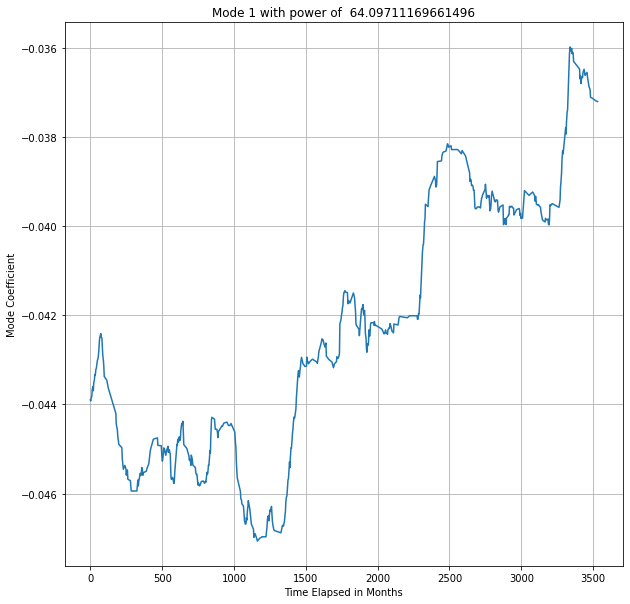

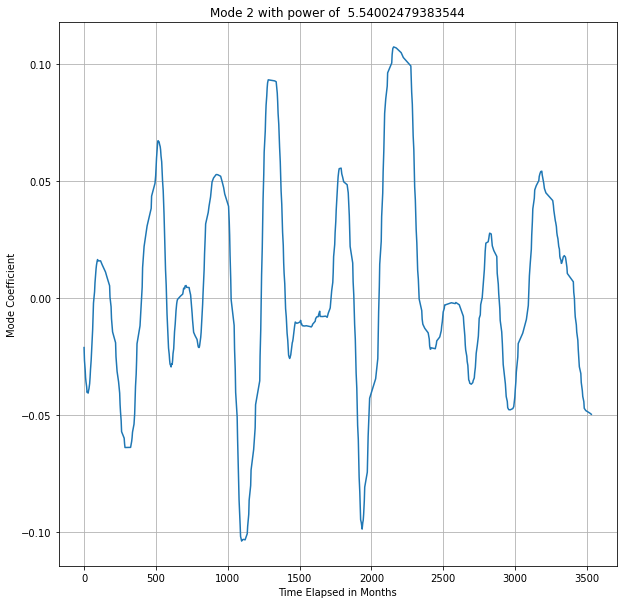

In [ ]:
# SVD analysis of frequency data
 
print(sAnalysiAmp)
svd.plotSVDModes(Xamp,timeArrayHankelized,sAnalysiAmp)

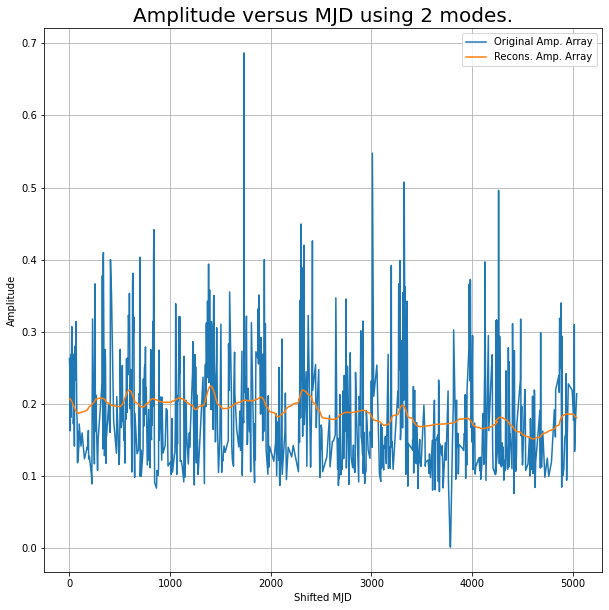

In [ ]:
# Plotting the reconstructed frequency data array.

fig = plt.figure(figsize=(10,10))
plt.plot(dateVectorShifted,ampArray,label='Original Amp. Array')
plt.plot(dateVectorShifted,ampArrayRecons,label='Recons. Amp. Array')
plt.xlabel('Shifted MJD')
plt.ylabel('Amplitude')
plt.title(f'Amplitude versus MJD using {noModesAmp} modes.',fontsize=20)
plt.grid()
plt.legend()